**Problem Statement:**

Airbnb has seen a significant revenue decline over the past few months. With travel restrictions lifting, there is a renewed opportunity to capture market demand. To help Airbnb prepare, we will analyze a dataset of New York listings to uncover key insights that can guide decisions in host acquisition, customer segmentation, property optimization, and pricing strategies. The analysis will focus on understanding which types of hosts to target, identifying neighborhoods with high demand, determining customer pricing preferences, and finding ways to improve traction for underperforming properties. Ultimately, this analysis aims to provide data-driven recommendations to improve revenue, enhance user experience, and optimize property listings in New York City.

In [1]:
#importing necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.shape

(48895, 16)

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.drop(['id','name','last_review'], axis = 1, inplace = True)

In [7]:
df.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
df.fillna({'reviews_per_month':0},inplace=True)

In [9]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
len(df.room_type.unique())

3

In [11]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
len(df.neighbourhood_group.unique())

5

In [13]:
df.host_id.value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [14]:
df2 = df.sort_values(by="calculated_host_listings_count",ascending=False)
df2.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39773,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332
41463,219517861,Sonder (NYC),Manhattan,Financial District,40.70782,-74.01227,Entire home/apt,396,2,8,2.12,327,289
41469,219517861,Sonder (NYC),Manhattan,Financial District,40.70620,-74.01192,Entire home/apt,498,2,8,2.50,327,255
38294,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
41468,219517861,Sonder (NYC),Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,0.77,327,351


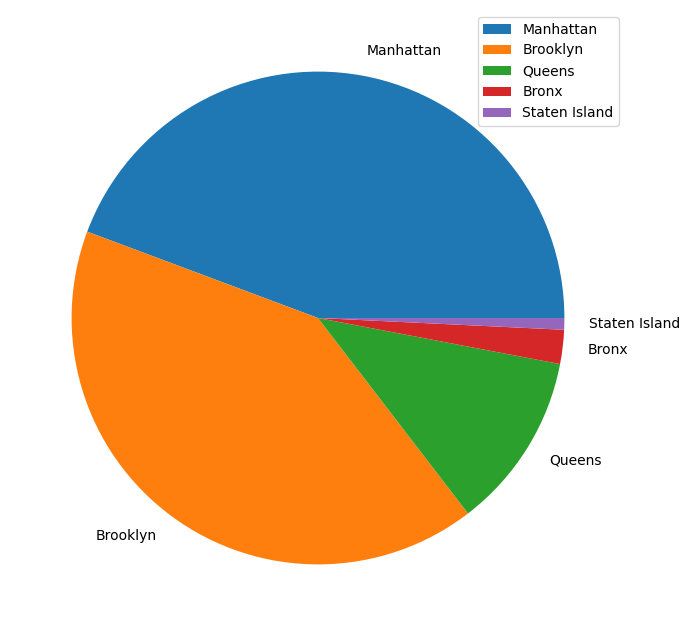

In [15]:
plt.figure(figsize=(8,8))
plt.pie(x = df2.neighbourhood_group.value_counts(normalize= True) * 100,labels = df2.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

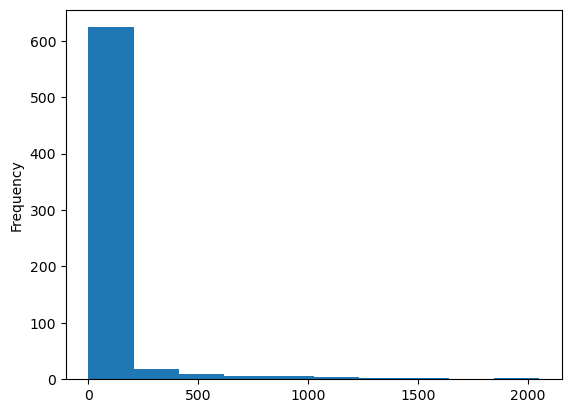

In [16]:
df2.price.value_counts().plot.hist()

<Axes: xlabel='reviews_per_month'>

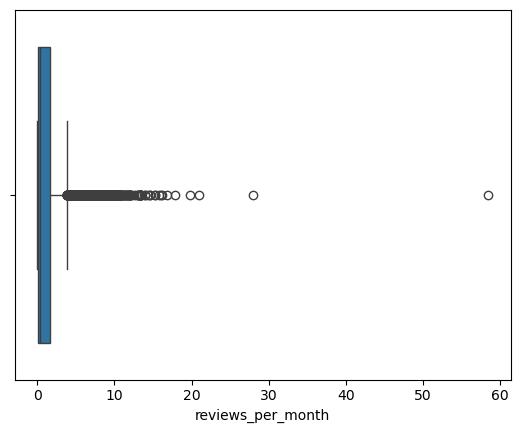

In [17]:
sns.boxplot(data=df2, x="reviews_per_month")

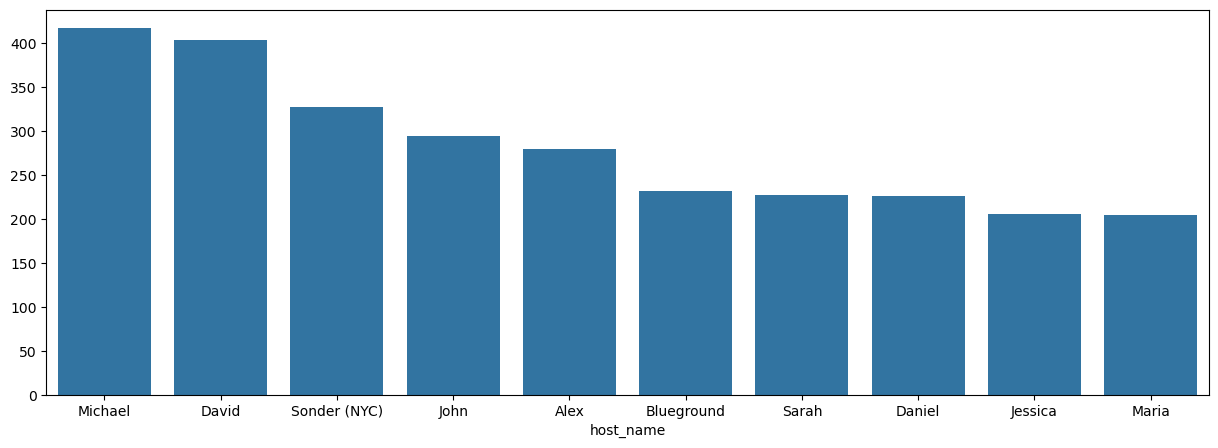

In [18]:
# Top 10 host's
plt.figure(figsize=(15,5))
sns.barplot(x = df2.host_name.value_counts().index[:10] , y = df2.host_name.value_counts().values[:10])
plt.show()

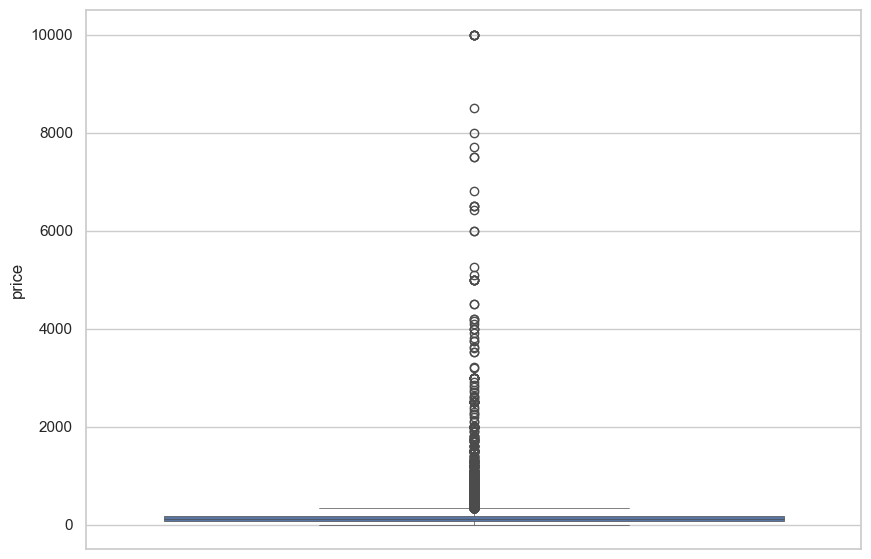

In [19]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(y = df2.price,width=0.8,
    dodge=True,
    fliersize=6,
    linewidth=.5,
    whis=1.5,
    color=None)
plt.show()

In [20]:
df2.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

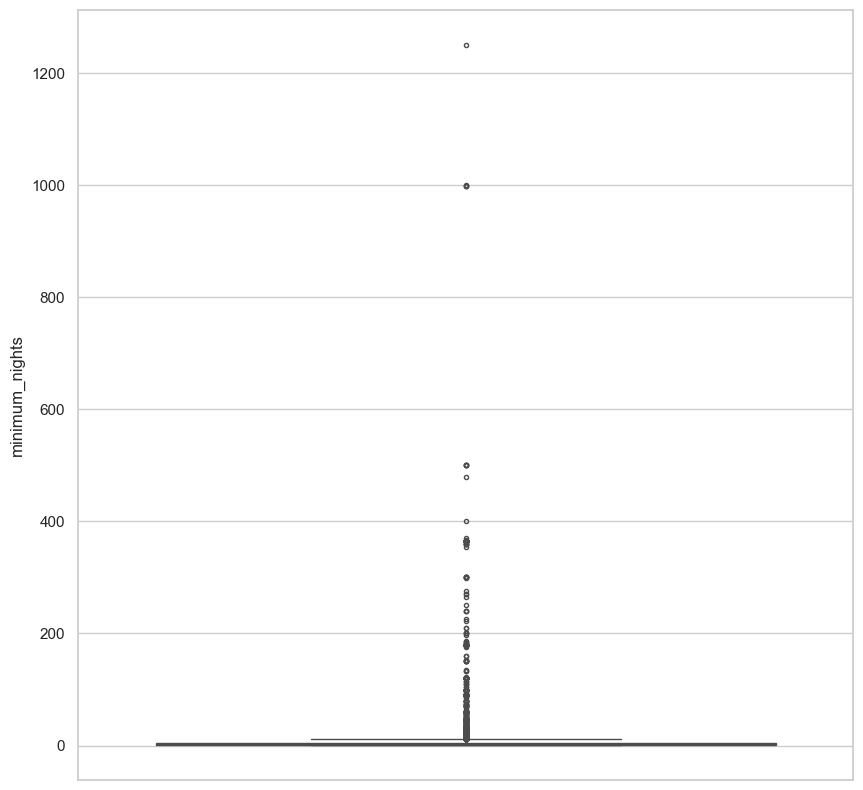

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df2.minimum_nights,fliersize=3)
plt.show()

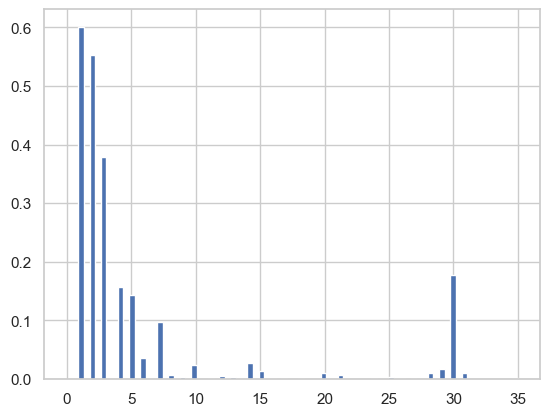

In [22]:
plt.hist(data = df2, x = 'minimum_nights',bins=80,range=(0,35),density=True)
plt.show()

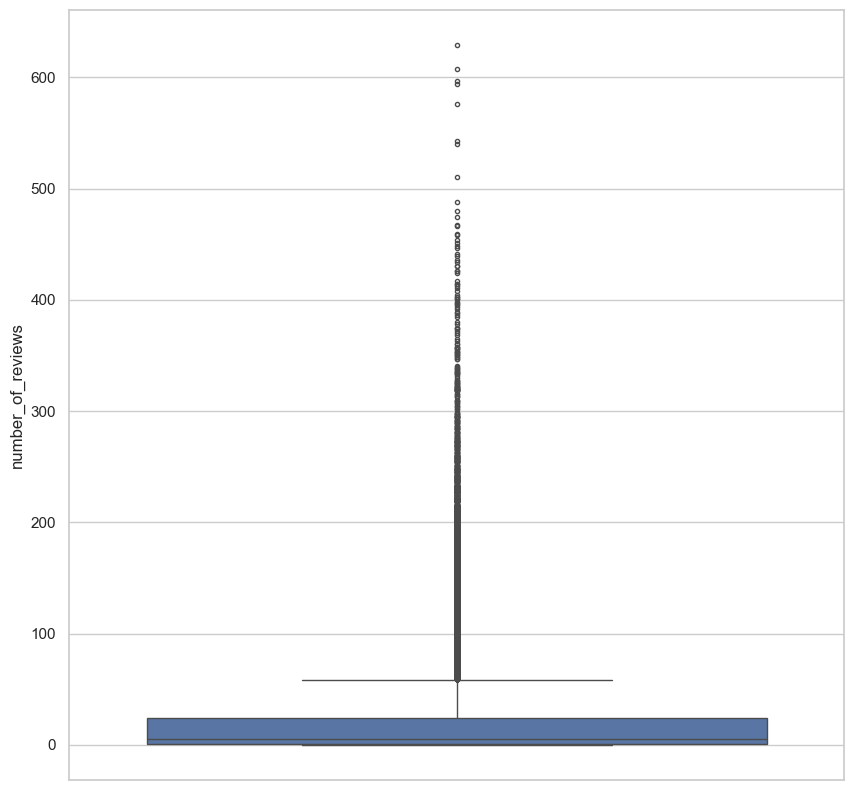

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df2.number_of_reviews,fliersize=3)
plt.show()

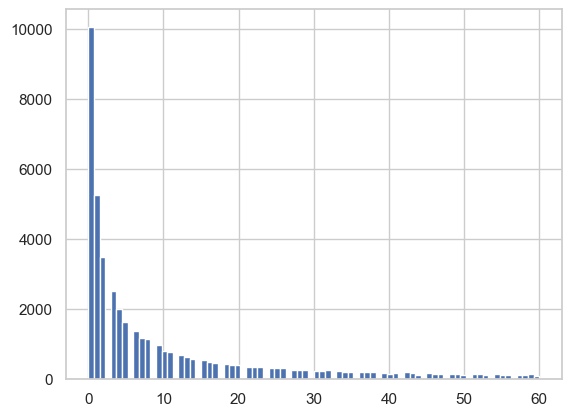

In [24]:
plt.hist(data = df2, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

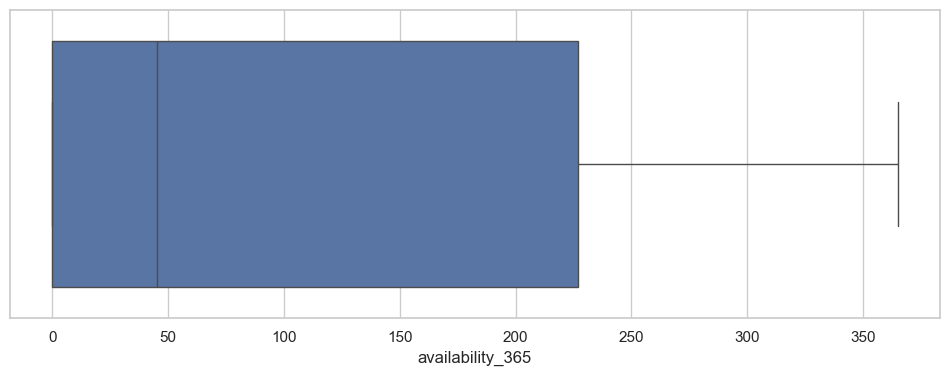

In [25]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df2 , x = 'availability_365')
plt.show()

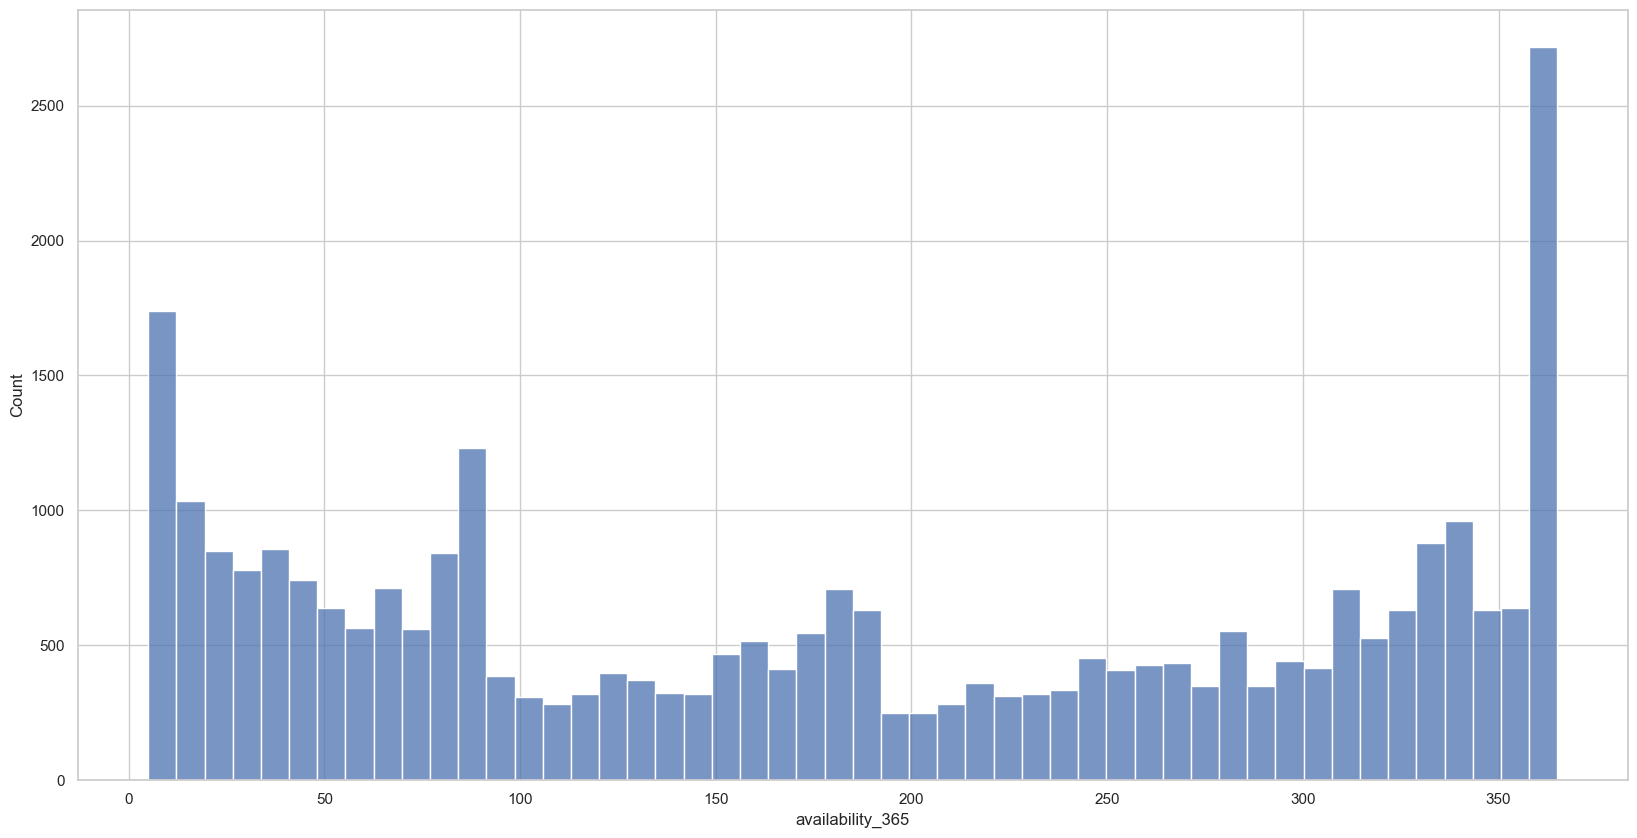

In [26]:
plt.figure(figsize = (20,10))
sns.histplot(data = df2, x = 'availability_365',bins=50,binrange=(5,365))
plt.show()

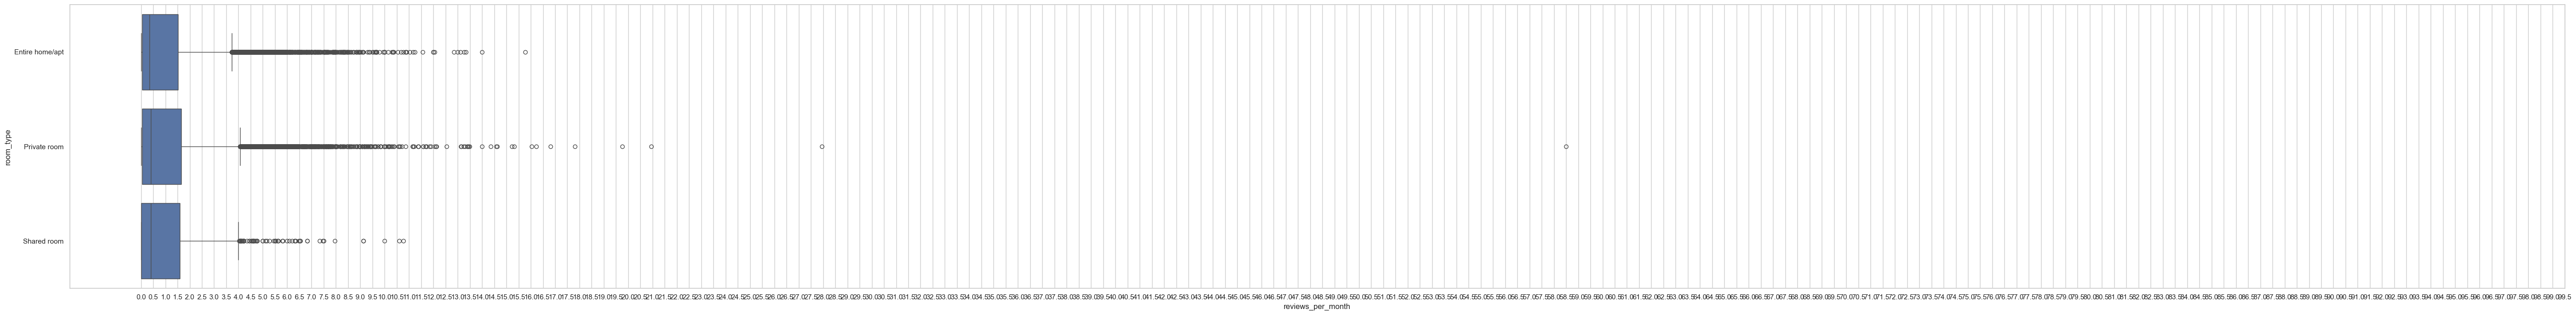

In [27]:
plt.figure(figsize=(70,8))
sns.boxplot(data = df2, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

In [28]:
df.to_csv('edited_file.csv', index=False)

In [29]:
from IPython.display import FileLink
FileLink('edited_file.csv')

C:\Users\prith\edited_file.csv